# Imports and Utilities

In [1]:
%load_ext autoreload
%autoreload 2
import gdsfactory as gf
import numpy as np
import pmag as pm
import os
from datetime import datetime
import dill
import tidy3d as td
import matplotlib.pyplot as plt
import gplugins.tidy3d as gt
import gplugins as gp
import gplugins.sax as gsax
import sax
if 'mats' in dir():
    print("mats already defined")
else:
    # mats = pm.materials.init_materials(['nitride', 'oxide', 'diamond'], plot=False)
    mats = pm.materials.init_materials(['nitride', 'oxide', 'diamond'], plot=False)
    # mats['diamond'] = mats['nitride']

layer_kwargs = {
    "box_thickness": 1, 
    "upper_nitride_thickness": .2, 
    "upper_nitride_bottom_depth": 2, 
    "lower_nitride_thickness": .1, 
    "lower_nitride_top_depth": 2.12, 
    "diamond_thickness": .21,
}
pdk = pm.pdks.get_nitride_window_pdk()
pdk.activate()
layer_stack = pm.layers.get_nitride_window_layer_stack(**layer_kwargs)

Initializing nitride material
Initializing oxide material
Initializing diamond material


2025-08-14 12:56:19.034 | ERROR    | kfactory.kcell:name:659 - Name conflict in kfactory.kcell::name at line 659
Renaming Unnamed_5 (cell_index=5) to 20250813_oxide_mask_test2 would cause it to be named the same as:
 - 20250813_oxide_mask_test2 (cell_index=0), function_name=None, basename=None
2025-08-14 12:57:26.864 | ERROR    | kfactory.kcell:name:659 - Name conflict in kfactory.kcell::name at line 659
Renaming Unnamed_18 (cell_index=18) to 20250813_oxide_mask_test2 would cause it to be named the same as:
 - 20250813_oxide_mask_test2 (cell_index=0), function_name=None, basename=None
 - 20250813_oxide_mask_test2 (cell_index=5), function_name=None, basename=None
2025-08-14 13:03:58.421 | ERROR    | kfactory.kcell:name:659 - Name conflict in kfactory.kcell::name at line 659
Renaming Unnamed_25 (cell_index=25) to 20250813_oxide_mask_test2 would cause it to be named the same as:
 - 20250813_oxide_mask_test2 (cell_index=0), function_name=None, basename=None
 - 20250813_oxide_mask_test2 (ce

# Pipeline Tools

# Journey

## Journey Init

In [32]:
journey ={ 
    'variables': {
        'elevator_args': {
            'l1': 4,
            'base_w1': 0.9,
            'tip_w1': 0.150,
            'layer_1': 'UPPER_NITRIDE',
            'l2': 10.5,
            'base_w2': 0.45,
            'tip_w2': 0.06,
            'layer_2': 'DIAMOND',
            'length_extension': 3,
            'offset': 4,
            'window_width': 3,
            'taper_port_markers': False
        },
        'mixer_args': {
            'coupling_length': 25.0,
            'mixer_length': 22,
            'dx': 10.0,
            'dy': 4.8,
            'coupler_layer': "UPPER_NITRIDE",
            'mixer_layer': "LOWER_NITRIDE",
            'width_coupler': 0.45,
            'width_mixer': 0.65,
            'width_mixer_tip': 0.02,
        }
    },
    'settings': {
        'elevator_component_args': {
            'layer_stack': layer_stack,
            'material_mapping': mats,
            'pad_xy_inner': 0,
            'pad_xy_outer': 0,
            'pad_z_inner': 0,
            'pad_z_outer': 0,
            'extend_ports': 0,
            'port_offset': 1,
        },
        'elevator_modeler_args': {
            'center_z': "upper_nitride",
            'port_size_mult': (5, 4),
            'sim_size_z': 2.5,
            'crop_x': 1,
            'crop_y': 1,
            'shift_x': 0,
            'shift_y': 0,
            'wavelength': (0.619+0.737)/2,
            'bandwidth': 2*(0.737-0.619),
            'num_freqs': 101,
            'symmetry': (0,0,0),
            'min_steps_per_wvl': 15,
            'run_time': 1.6e-12,
            'mode_spec': td.ModeSpec(num_modes=1, filter_pol='te'),
            'boundary_spec': td.BoundarySpec(
            x=td.Boundary(minus=td.PML(), plus=td.PML()),
            y=td.Boundary(minus=td.PML(), plus=td.PML()),
            z=td.Boundary(minus=td.PML(), plus=td.PML()),),
            'extra_monitors': [
                td.FieldMonitor(name='field', center=[0,0, 0], size=[td.inf, 0, td.inf], interval_space=(4,4,1), freqs=[td.C_0/0.619,td.C_0/0.737])
            ]
        },
        
        'mixer_component_args': {
            'layer_stack': layer_stack,
            'material_mapping': mats,
            'pad_xy_inner': 0,
            'pad_xy_outer': 3,
            'pad_z_inner': 0,
            'pad_z_outer': 0,
            'extend_ports': 0,
            'port_offset': 0,
        },
        'mixer_modeler_args': {
            'center_z': "upper_nitride",
            'port_size_mult': (5, 4),
            'sim_size_z': 2.5,
            'crop_x': -2,
            'crop_y': -1.5,
            'shift_x': 0,
            'shift_y': 0,
            'wavelength': 0.619,
            'bandwidth': 0.1,
            'num_freqs': 101,
            'symmetry': (0,0,0),
            'min_steps_per_wvl': 15,
            'run_time': 1.8e-12,
            'mode_spec': td.ModeSpec(num_modes=1, filter_pol='te'),
            'boundary_spec': td.BoundarySpec(
            x=td.Boundary(minus=td.PML(), plus=td.PML()),
            y=td.Boundary(minus=td.PML(), plus=td.PML()),
            z=td.Boundary(minus=td.PML(), plus=td.PML()),),
            'extra_monitors': [
                td.FieldMonitor(name='field', center=[0,0, 0], size=[td.inf, 0, td.inf], interval_space=(4,4,1), freqs=[td.C_0/0.619])
            ]
        }
    }
}

## GDS Elevator

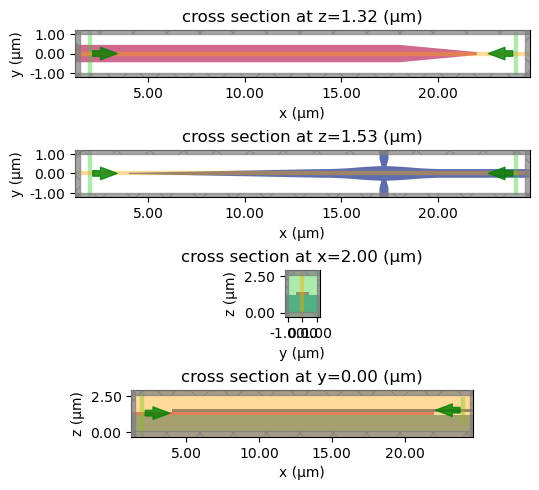

Grid size (19315296) and total time steps (46310) are within daily allowance.


In [33]:

start_x = 0
end_x = 18
start_y = -1.5
end_y = 1.5
file_path = '/home/floresh2/file_system/git/pmag/dev/for_helaman.gds'
gds = gf.read.import_gds(file_path)

in_box = gf.Component()
box = gf.components.rectangle(size=(end_x-start_x, end_y-start_y), layer=(2, 0))
box_ref = in_box << box
in_box.move((start_x, start_y))

cropped_diamond = gf.boolean(A=gds, B=in_box, operation="and", layer1=(1, 0), layer2=(2, 0), layer=(2, 0))
cropped_diamond.add_port('o1', center=(0, 0), width=0.05, orientation=180, layer='DIAMOND')
cropped_diamond.add_port('o2', center=(end_x, 0), width=0.45, orientation=0, layer='DIAMOND')

c = pm.devices.elevator(**journey['variables']['elevator_args'],taper_2=cropped_diamond)
td_c = gt.Tidy3DComponent(component=c, **journey['settings']['elevator_component_args'])
# initialize the tidy3d ComponentModeler

modeler = td_c.get_component_modeler( **journey['settings']['elevator_modeler_args'])

# we can plot the tidy3d simulation setup
fig, ax = plt.subplots(4, 1)
modeler.plot_sim(z=td_c.get_layer_center("upper_nitride")[2], ax=ax[0])
modeler.plot_sim(z=td_c.get_layer_center("diamond")[2], ax=ax[1])
modeler.plot_sim(x=td_c.ports[0].dcenter[0], ax=ax[2])
modeler.plot_sim(y=td_c.ports[0].dcenter[1], ax=ax[3])
fig.tight_layout()
plt.show()

pm.tidytools.validate_sim_for_daily_allowance(modeler.simulation)






In [34]:

sp = gt.write_sparameters(
    component=c,
    **journey['settings']['elevator_component_args'],
    **journey['settings']['elevator_modeler_args'],
    run_only=[('o2', 0)], # run only the (port, mode_index)
)

Output()

13:48:18 EDT Started working on Batch containing 1 tasks.

13:48:19 EDT Maximum FlexCredit cost: 0.675 for the whole batch.

             Use 'Batch.real_cost()' to get the billed FlexCredit cost after the
             Batch has completed.

Output()

13:50:26 EDT Batch complete.

Output()

13:50:27 EDT ERROR: Failed to download the simulation data file from the server.
             Please confirm that the task was successfully run.                 

13:50:28 EDT ERROR: Failed to download the simulation data file from the server.
             Please confirm that the task was successfully run.                 

WebError: Failed to download the simulation data file from the server. Please confirm that the task was successfully run.

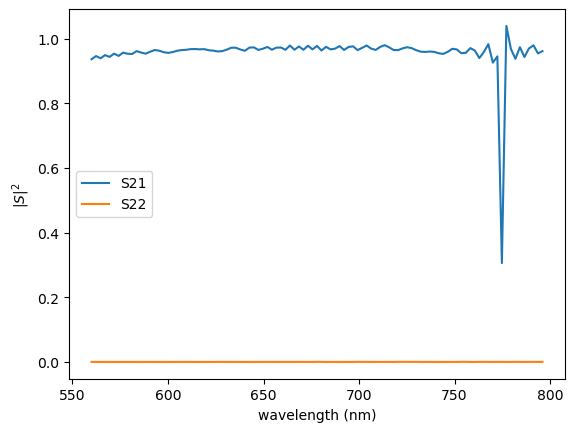

In [17]:

gp.plot.plot_sparameters(sp, logscale=False, with_simpler_labels=True)

## Mixer

0.02


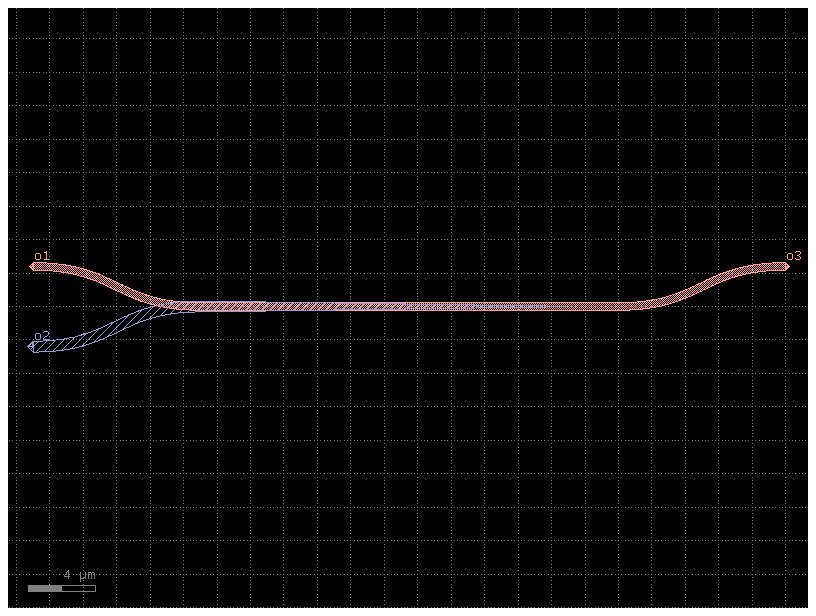

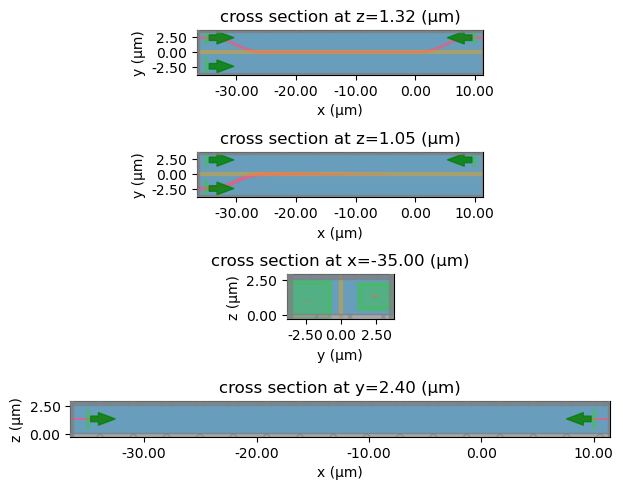

Grid size (99599214) and total time steps (47440) are within daily allowance.


In [31]:
c = pm.devices.directional_mixer(**journey['variables']['mixer_args'])
td_c = gt.Tidy3DComponent(component=c, **journey['settings']['mixer_component_args'])
# initialize the tidy3d ComponentModeler

modeler = td_c.get_component_modeler( **journey['settings']['mixer_modeler_args'])

# we can plot the tidy3d simulation setup
fig, ax = plt.subplots(4, 1)
modeler.plot_sim(z=td_c.get_layer_center("upper_nitride")[2], ax=ax[0])
modeler.plot_sim(z=td_c.get_layer_center("lower_nitride")[2], ax=ax[1])
modeler.plot_sim(x=td_c.ports[0].dcenter[0], ax=ax[2])
modeler.plot_sim(y=td_c.ports[0].dcenter[1], ax=ax[3])
fig.tight_layout()
plt.show()

pm.tidytools.validate_sim_for_daily_allowance(modeler.simulation)


In [13]:
sp = gt.write_sparameters(
    component=c,
    **journey['settings']['mixer_component_args'],
    **journey['settings']['mixer_modeler_args'],
    run_only=[('o1', 0),('o2', 0)], # run only the (port, mode_index)
)

Output()

10:28:39 EDT Started working on Batch containing 2 tasks.

10:28:41 EDT Maximum FlexCredit cost: 5.821 for the whole batch.

             Use 'Batch.real_cost()' to get the billed FlexCredit cost after the
             Batch has completed.

Output()

10:33:05 EDT Batch complete.

Output()

Simulation saved to PosixPath('/home/floresh2/.gdsfactory/sparameters/0651554e24017b21e56a360bbd820ee5b0af1e083103ba5296ec2432f29431bf.npz')


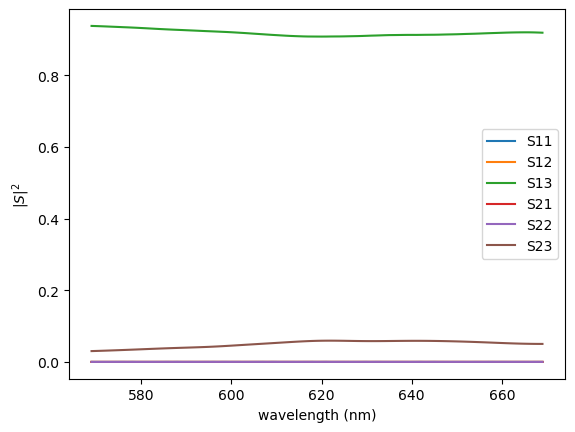

In [ ]:

gp.plot.plot_sparameters(sp, logscale=False, with_simpler_labels=True)